# Exploratory Data Analysis (EDA) on the Global Superstore Database

## Problem Statement

Sales Trends and Patterns: Identify the seasonal fluctuations and trends in sales across product categories and regions.

Profitability Analysis: Analyze profit margins across product categories, customer segments, and regions to identify high-margin areas.

Customer Segmentation: Segment customers based on purchasing behavior to identify valuable customer segments and their preferences.

Product Performance: Assess the performance of products and categories to identify top-sellers and underperforming items.

Regional Analysis: Evaluate sales and profitability across regions to identify growth opportunities and regional preferences.

Shipping Dynamics: Analyze shipping preferences, delivery times, and costs to optimize logistics and improve customer satisfaction.

Promotional Effectiveness: Evaluate the impact of promotions and discounts on sales and profitability.

Return Analysis: Investigate return rates and reasons to minimize returns and improve product quality.

#### Import Necessary Libraries

The code imports necessary libraries for data analysis and visualization, including pandas, numpy, matplotlib, and seaborn.
                                                                        
Pandas is commonly used for data manipulation and analysis.
    
NumPy is used for numerical computations.
    
Matplotlib and Seaborn are popular libraries for data visualization.

In [13]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt     
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv(r"D:\Data Analysis Projects\Global_SuperStore_16.csv")

In [15]:
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned
0,0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,...,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High,NaN
1,1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,NaN
2,2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,NaN
3,3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,NaN
4,4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,NaN


In [16]:
df.columns

Index(['Unnamed: 0', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Postal Code',
       'City', 'State', 'Country', 'Region', 'Market', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Returned'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51290 non-null  int64  
 1   Row ID          51290 non-null  int64  
 2   Order ID        51290 non-null  object 
 3   Order Date      51290 non-null  object 
 4   Ship Date       51290 non-null  object 
 5   Ship Mode       51290 non-null  object 
 6   Customer ID     51290 non-null  object 
 7   Customer Name   51290 non-null  object 
 8   Segment         51290 non-null  object 
 9   Postal Code     9994 non-null   float64
 10  City            51290 non-null  object 
 11  State           51290 non-null  object 
 12  Country         51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Market          51290 non-null  object 
 15  Product ID      51290 non-null  object 
 16  Category        51290 non-null  object 
 17  Sub-Category    51290 non-null 

DataFrame Information:

The DataFrame 'df' contains 51,290 entries across 25 columns.
Column names and their respective data types are displayed.
Several columns contain non-null values, while others have missing values (e.g., 'Postal Code' and 'Returned').
'Order Date' and 'Ship Date' columns are datetime objects, likely representing the date and time of order and shipment.
Numeric columns include 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit', and 'Shipping Cost'.
Object type columns include 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region', 'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Order Priority', and 'Returned'.

In [18]:
df.isnull().sum()

Unnamed: 0            0
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Returned          49088
dtype: int64

The 'Postal Code' column has a significant number of missing values, and the 'Returned' column also has a considerable number of missing values.
The 'Postal Code' column doess no tseem  essential for my analysis, I am going to drop it altogether.
I plan to replace missing values with a specific category like 'No' if orders were not returned.

In [19]:
## Cheking for duplicates
df.duplicated().sum()

np.int64(0)

In [20]:
## Data Removal

## Removes several columns from the 'df' DataFrame

df.drop(['Row ID', 'Order ID', 'Ship Date', 'Customer ID', 'Postal Code', 'Product Name'], axis=1, inplace = True)

In [21]:
## Fill the missing values in the 'Returned' column of the 'df' DataFrame with the string 'No'

df['Returned'].fillna('No', inplace=True)

In [22]:
df.isnull().sum()

Unnamed: 0        0
Order Date        0
Ship Mode         0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Returned          0
dtype: int64

## Feature Engineering

### Adding several new columns to the 'df' DataFrame from the metrics:

'Year': Extracted from the 'Order Date' column, representing the year of the order.

'Month': Extracted from the 'Order Date' column, representing the month of the order.

'Cost': Calculated as the difference between 'Sales' and 'Profit', representing the cost incurred.

'Total Amount': Calculated as the sum of 'Sales' and 'Shipping Cost', representing the total amount including shipping cost.

In [25]:
# New column
## Convert Order Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

## EXtract the year and month to create a new column
df['Year'] = df['Order Date'].dt.year

df['Month'] = df['Order Date'].dt.month

In [26]:
# Extracting the total revenue generated from sales.
df['Total Sales'] = df['Sales'] * df['Quantity']

# The total profit generated from sales.
df['Total Profit'] = df['Profit'] * df['Quantity']

# The total cost incurred for shipping.
df['Total Shipping Cost'] = df['Shipping Cost'] * df['Quantity'] 

In [27]:
## Checking for the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           51290 non-null  int64         
 1   Order Date           51290 non-null  datetime64[ns]
 2   Ship Mode            51290 non-null  object        
 3   Customer Name        51290 non-null  object        
 4   Segment              51290 non-null  object        
 5   City                 51290 non-null  object        
 6   State                51290 non-null  object        
 7   Country              51290 non-null  object        
 8   Region               51290 non-null  object        
 9   Market               51290 non-null  object        
 10  Product ID           51290 non-null  object        
 11  Category             51290 non-null  object        
 12  Sub-Category         51290 non-null  object        
 13  Sales                51290 non-

In [28]:
## Summary Statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,51290.0,25644.5,0.0,12822.25,25644.5,38466.75,51289.0,14806.29199
Order Date,51290,2014-05-11 21:26:49.155780608,2012-01-01 00:00:00,2013-06-19 00:00:00,2014-07-08 00:00:00,2015-05-22 00:00:00,2015-12-31 00:00:00,NaN
Sales,51290.0,246.490581,0.444,30.758625,85.053,251.0532,22638.48,487.565361
Quantity,51290.0,3.476545,1.0,2.0,3.0,5.0,14.0,2.278766
Discount,51290.0,0.142908,0.0,0.0,0.0,0.2,0.85,0.21228
Profit,51290.0,28.610982,-6599.978,0.0,9.24,36.81,8399.976,174.340972
Shipping Cost,51290.0,26.478567,1.002,2.61,7.79,24.45,933.57,57.251373
Year,51290.0,2013.777208,2012.0,2013.0,2014.0,2015.0,2015.0,1.098931
Month,51290.0,7.516027,1.0,5.0,8.0,10.0,12.0,3.300526
Total Sales,51290.0,1205.327987,0.444,66.93,245.772,904.875,135830.88,3452.079528


In [29]:
## Segmenting columns into Categorical and Numerical
cat_col = df.select_dtypes(include='object').columns.tolist()
num_col = df.select_dtypes(include=np.number).columns.tolist()

print(cat_col)
print(num_col)

['Ship Mode', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region', 'Market', 'Product ID', 'Category', 'Sub-Category', 'Order Priority', 'Returned']
['Unnamed: 0', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Year', 'Month', 'Total Sales', 'Total Profit', 'Total Shipping Cost']


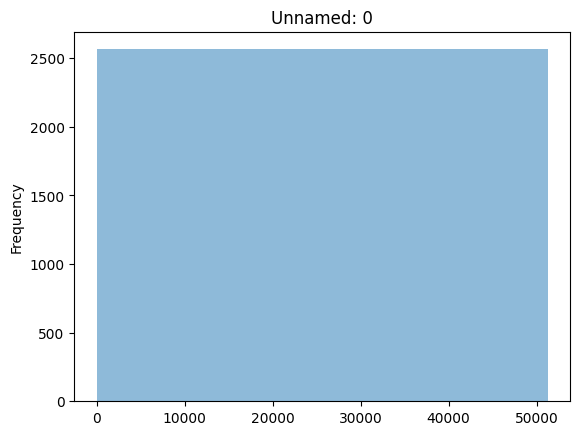

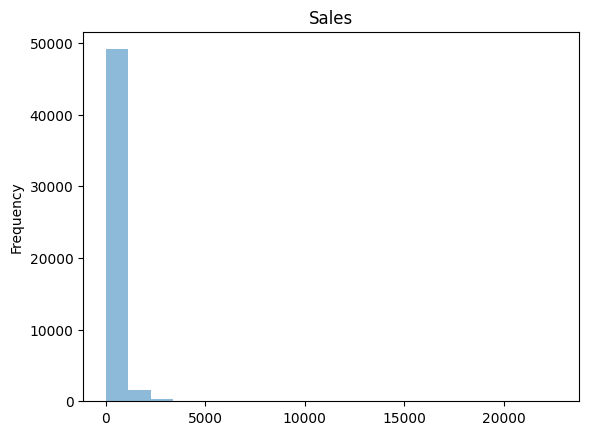

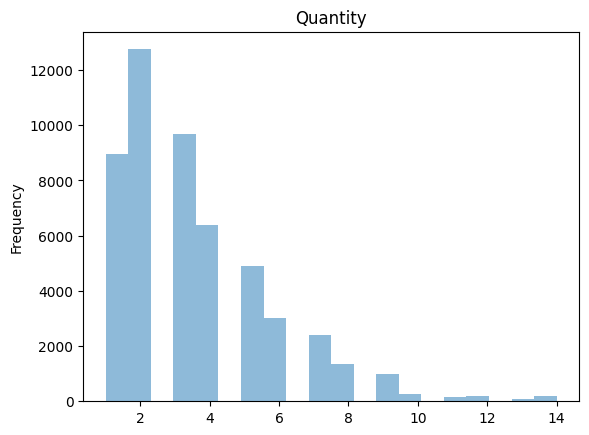

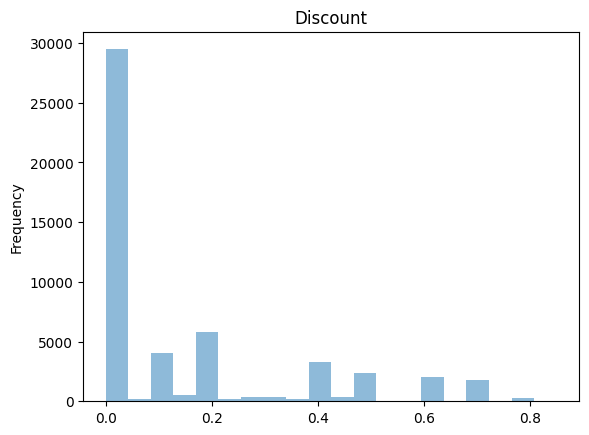

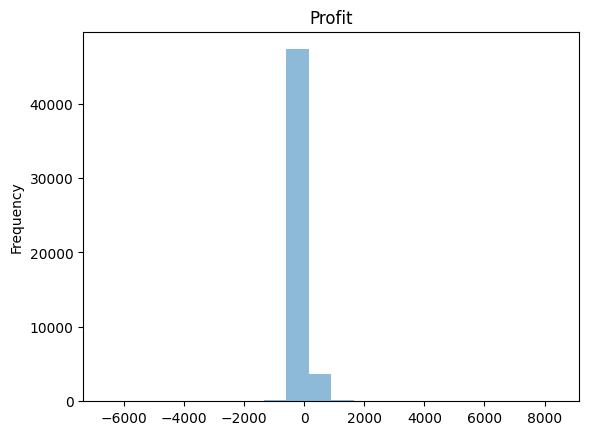

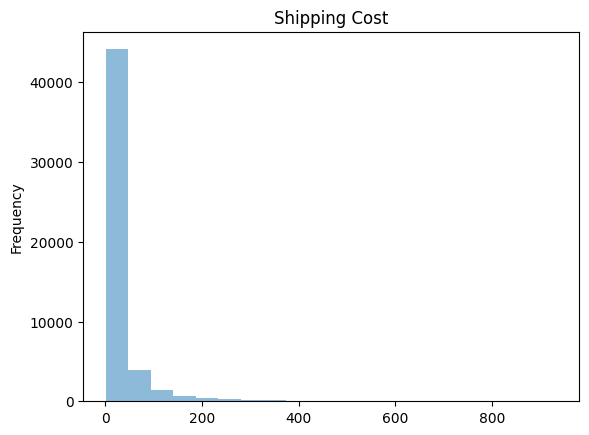

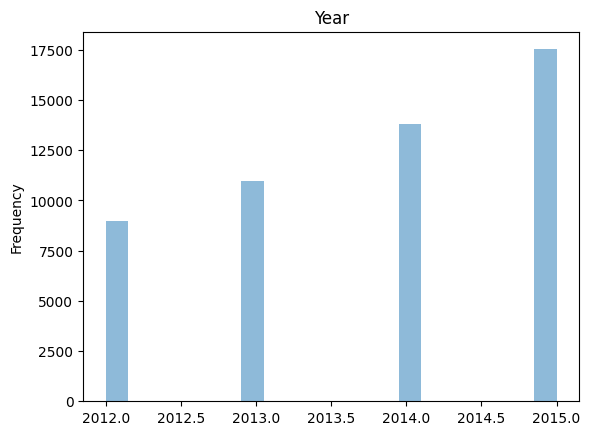

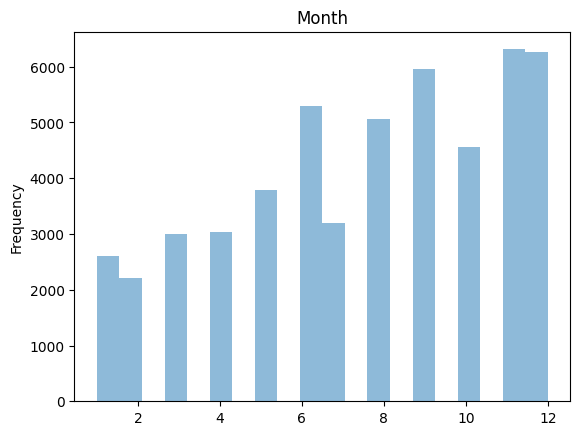

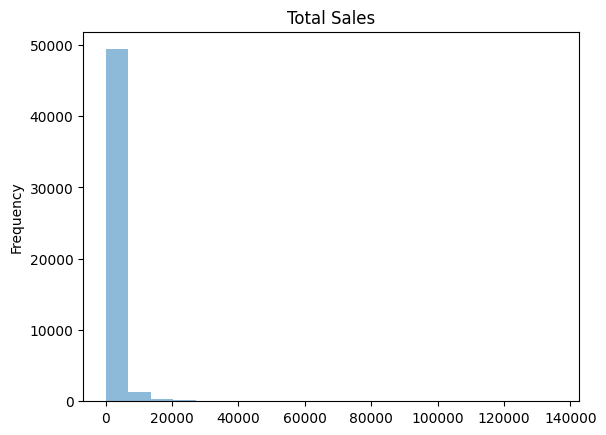

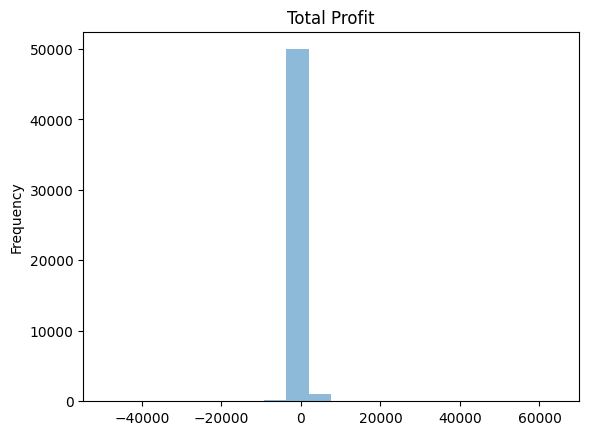

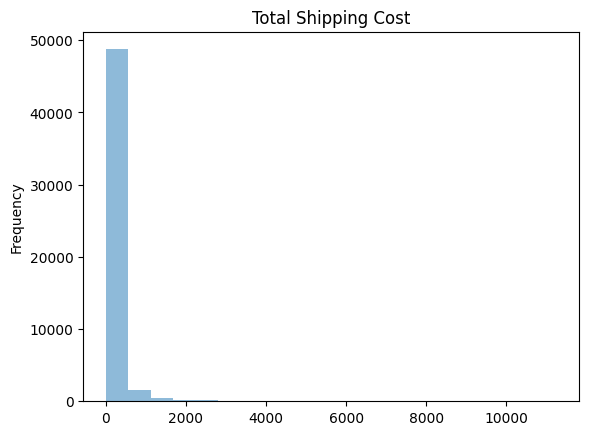

In [30]:
## Using a for loop to iterate the numerical column to display the distribution

for col in num_col:
    plt.subplot(1,1,1)
    df[col].hist(bins=20, alpha=0.5, grid=False)
    plt.ylabel('Frequency')
    plt.title(col)
    plt.show()

Most orders consist of 1 to 5 items, with 2 being the most common quantity.

Discounts of 20%, 10%, 40%, and 60% are among the most common.

Profits vary widely, ranging from significant profits to losses. A considerable number of orders result in zero profit.

Most common shipping costs include  1.35, 1.97, 1.79, 1.80, and $1.62

Orders are distributed across the years 2012 to 2015, with 2015 having the highest number of orders

Orders are spread across different months, with November and December having the highest number of orders.

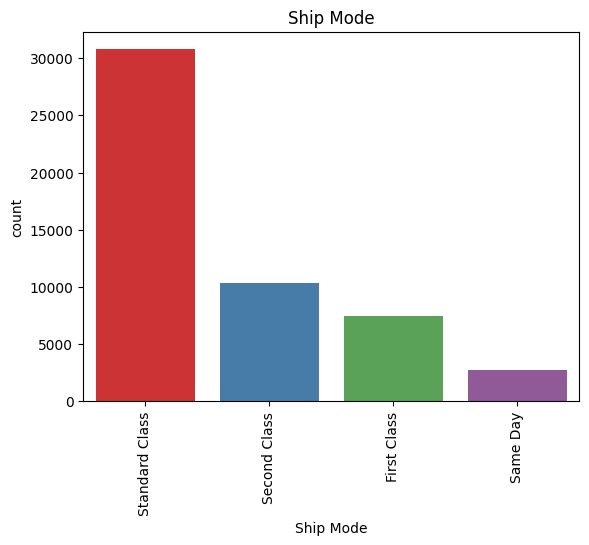

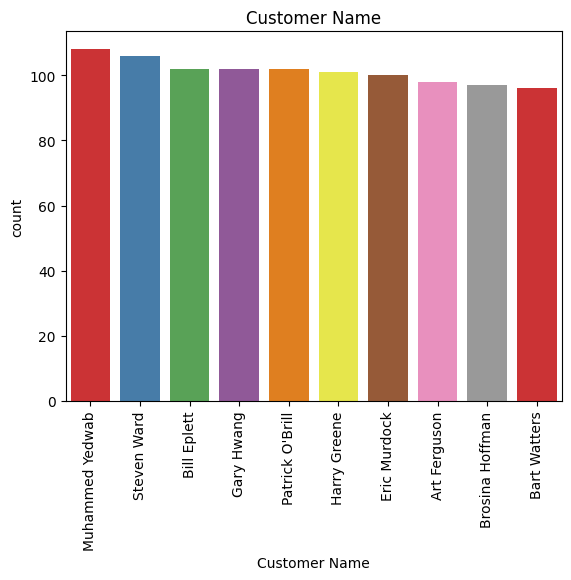

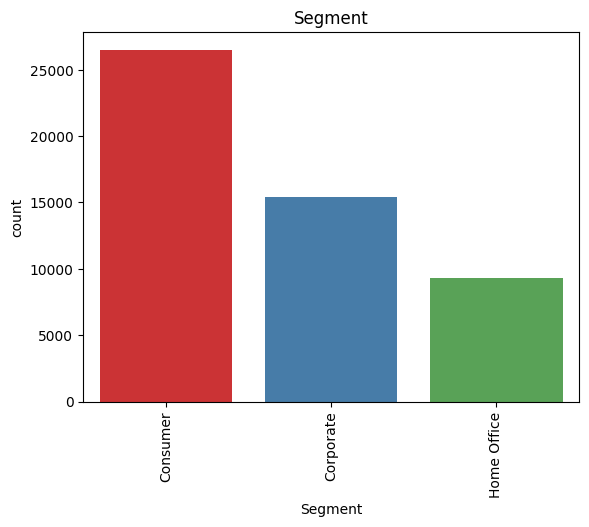

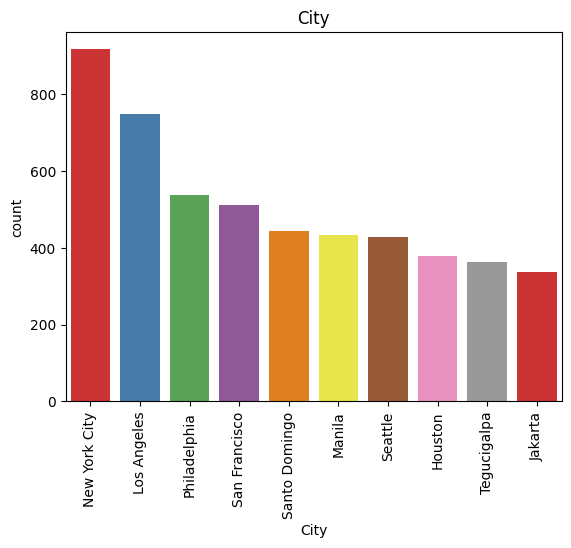

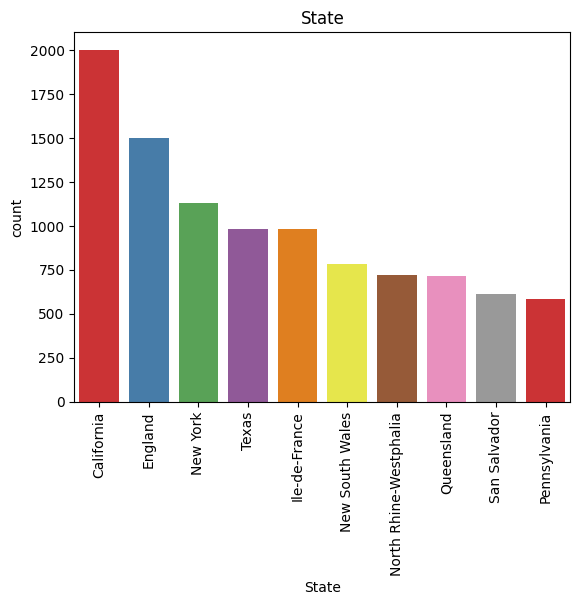

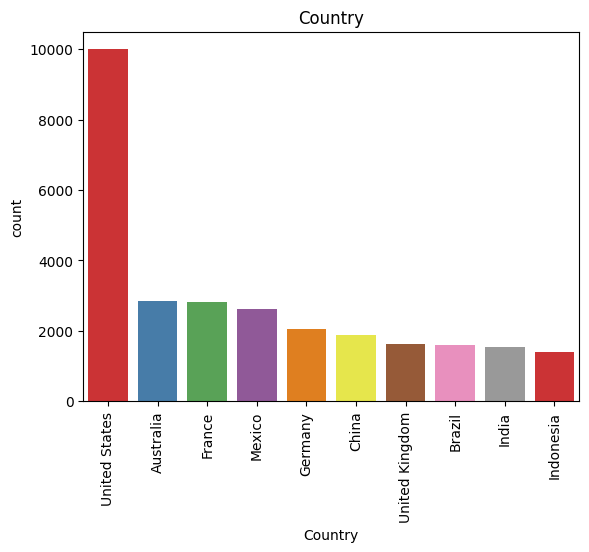

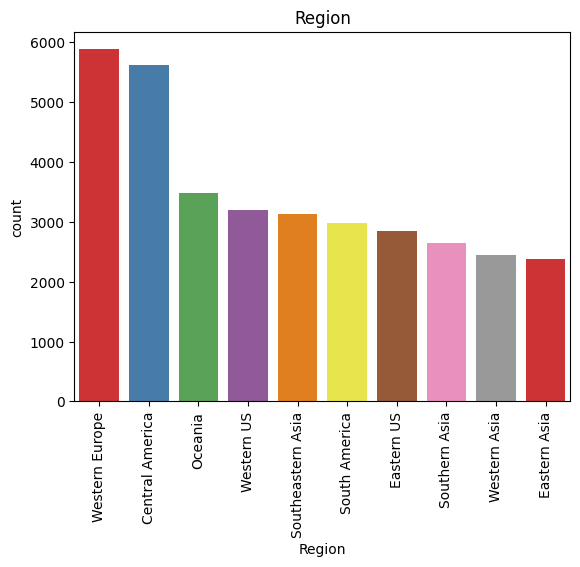

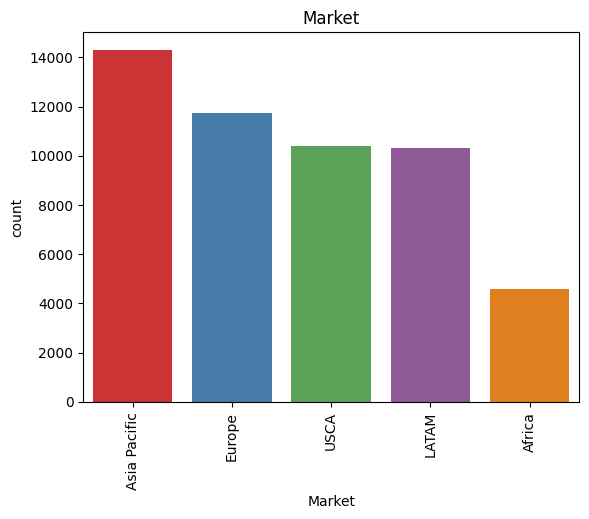

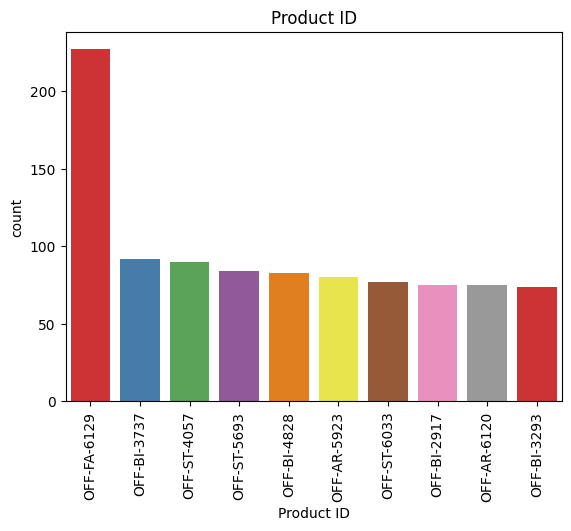

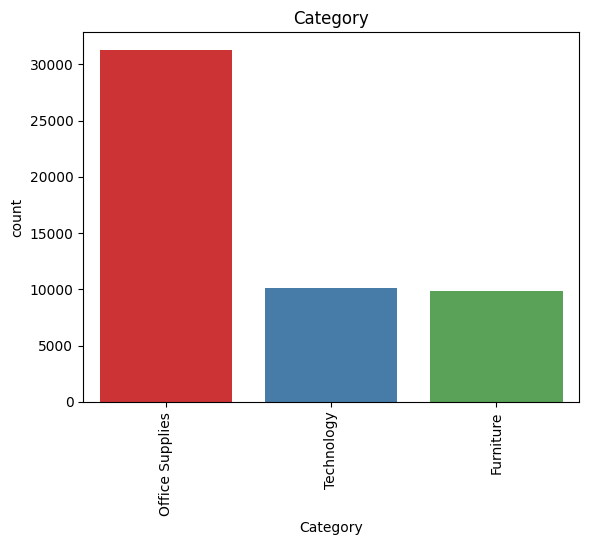

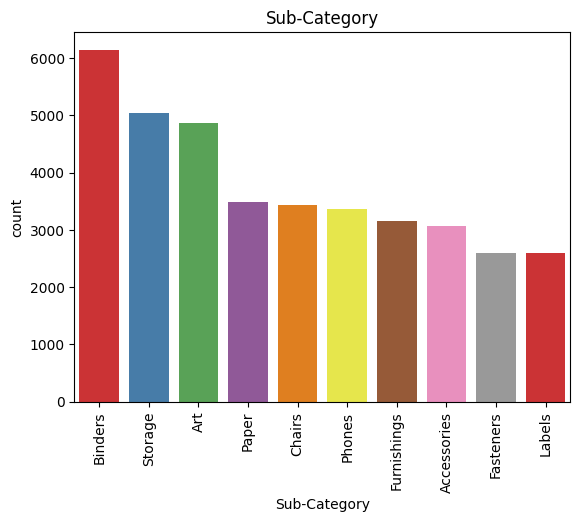

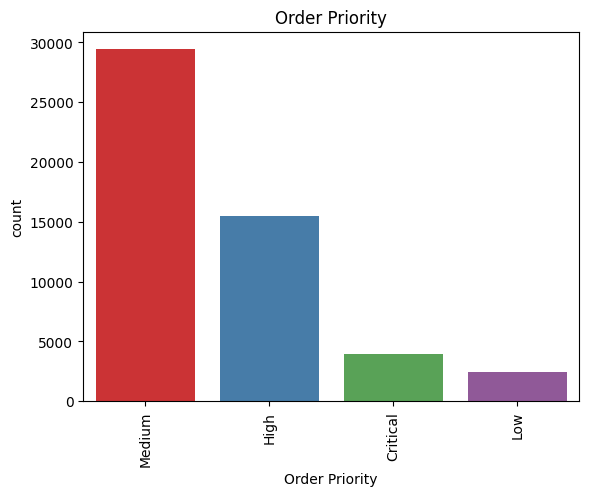

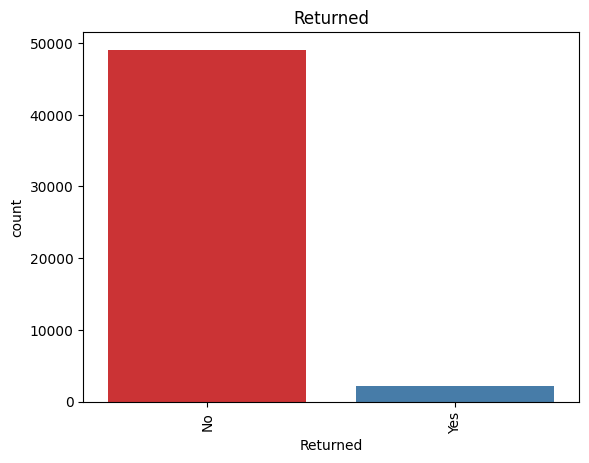

In [31]:
## Using a for loop to iterate the categorical column to display the distribution
for col in cat_col:
    plt.figure()  # Adjust the figsize as needed
    sns.countplot(x=col, data=df, order=df[col].value_counts().head(10).index, palette='Set1')
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()

The provided series of value counts represents the distribution of various categorical variables in the dataset.

Most orders are shipped using "Standard Class" (30,775 orders), followed by "Second Class" (10,309 orders), "First Class" (7,505 orders), and "Same Day" (2,701 orders).

The majority of orders are from the "Consumer" segment (26,518 orders), followed by "Corporate" (15,429 orders), and "Home Office" (9,343 orders).

The dataset includes orders from different countries, with the majority from the "United States" (9,994 orders).

Orders are from different states, with "California" having the highest number of orders (2,001 orders).

Orders are distributed across different regions, with "Western Europe" having the highest number of orders (5,883 orders).

The market is segmented into different regions, with "Asia Pacific" having the highest number of orders (14,302 orders).

Most orders are for "Office Supplies" (31,289 orders), followed by "Technology" (10,141 orders), and "Furniture" (9,860 orders).

## Analysis on the Metrics and KPIs

In [32]:
# Set the display format for floating point numbers
pd.options.display.float_format = '{:,.2f}'.format

In [33]:
## Net sales
print(f'Net Sales {df['Sales'].sum()}')

Net Sales 12642501.90988


In [34]:
# Net Profit
print(f'Net Profit {df['Profit'].sum()}')

Net Profit 1467457.29128


In [35]:

print(f'Gross Sales {df['Total Sales'].sum()}')

Gross Sales 61821272.47008


In [36]:
print(f'Gross Profit {df['Total Profit'].sum()}')

Gross Profit 7228245.595880001


In [38]:
## Profit margin =  Total profit / Total Sales
# Format as percentage
print(f'Profit Margin {round(df['Total Profit'].sum()/df['Total Sales'].sum() * 100)} %')

Profit Margin 12 %


In [39]:
##Total cost = Total Sales / Total Profit - Total Shipping Cost

print(f'Total Cost {df['Total Sales'].sum() - df['Total Profit'].sum() - df['Total Shipping Cost'].sum()}')


Total Cost 48052860.08724


In [40]:
## Net Profit = Total Profit - Total Shipping Cost

print(f'Net Profit {df['Total Profit'].sum() - df['Total Shipping Cost'].sum()}')


Net Profit 688078.8089200007


In [41]:
# Grouping the data by month to calculate sum of sales, profit and quantity. This shows the annual KPIs
year_analysis = df.groupby('Year').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [49]:
year_analysis.style.background_gradient(cmap='BrBG')

,Year,Sales,Profit,Quantity
0,2012,2259450.895540,248940.811540,31443
1,2013,2677438.694400,307415.279100,38111
2,2014,3405746.449380,406935.230180,48136
3,2015,4299865.870560,504165.970460,60622


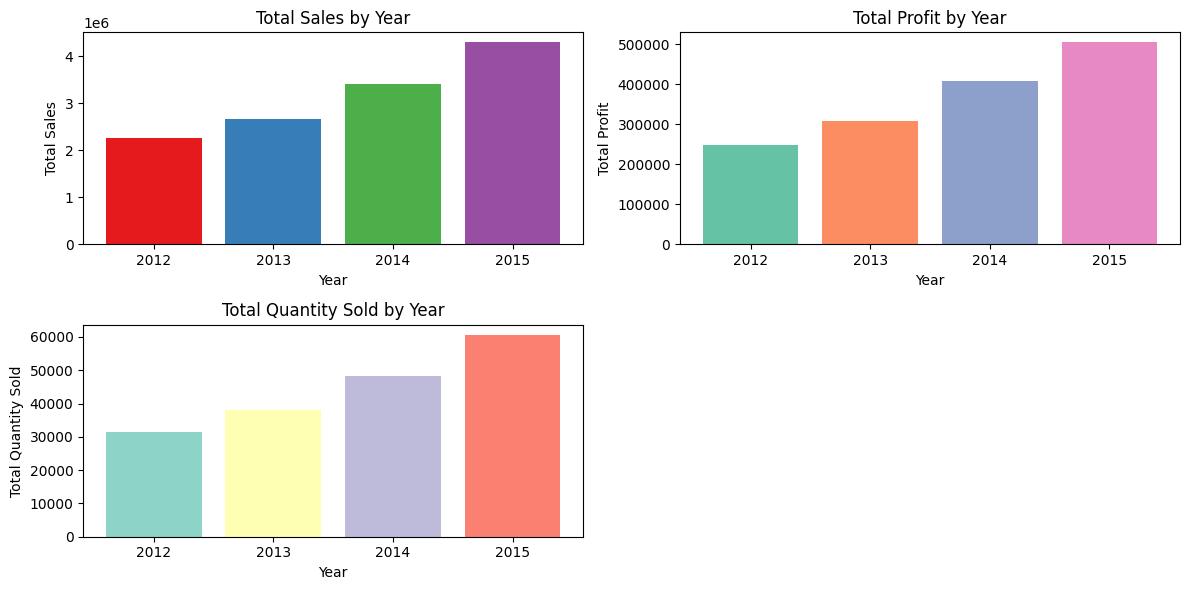

In [44]:
# Plotting the data
plt.figure(figsize=(12, 6))


# Sales plot
plt.subplot(2, 2, 1)
plt.bar(year_analysis['Year'], year_analysis['Sales'], color=sns.color_palette('Set1'))
plt.xticks([2012,2013,2014,2015])
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(year_analysis['Year'], year_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks([2012,2013,2014,2015])
plt.title('Total Profit by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(year_analysis['Year'], year_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks([2012,2013,2014,2015])
plt.title('Total Quantity Sold by Year')
plt.xlabel('Year')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()


Sales and profit show an increasing trend over the years, indicating positive growth in business activities.

The most significant growth is observed between 2014 and 2015, with both sales and profit substantially increasing.

In [47]:
# Group data by month and calculate sum of Sales, Profit and Quantity
monthly_data = df.groupby('Month').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).reset_index()

In [48]:
monthly_data.style.background_gradient(cmap='BrBG')


,Month,Sales,Profit,Quantity
0,12,1566662.447500,168101.707100,22147
1,11,1546728.156160,175983.189460,22379
2,9,1431753.403480,169705.822080,20479
3,8,1294314.957820,154593.439420,17596
4,6,1262080.916940,144604.768440,18009
5,10,1185227.689720,158903.895920,16303
6,5,915492.830880,106970.037880,13196
7,3,760517.975960,91873.579660,10390
8,7,752306.302220,76525.695020,11046
9,4,695978.410840,73822.418640,10466


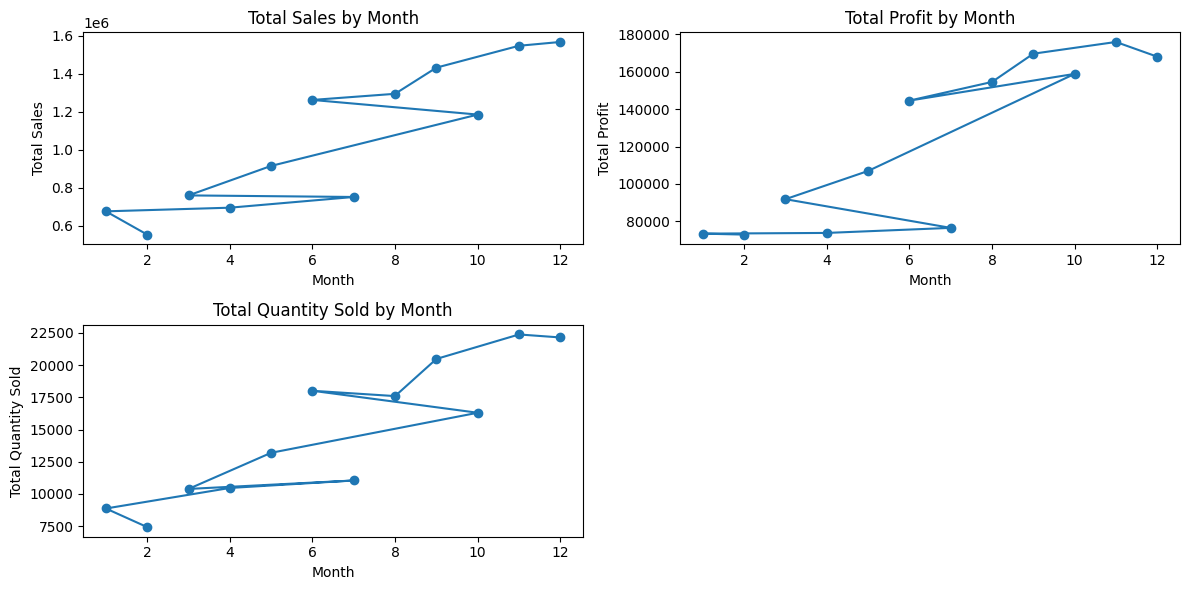

In [50]:
 #Plotting the data
plt.figure(figsize=(12, 6))

# Sales plot
plt.subplot(2, 2, 1)
plt.plot(monthly_data['Month'], monthly_data['Sales'], marker='o')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.plot(monthly_data['Month'], monthly_data['Profit'], marker='o')
plt.title('Total Profit by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.plot(monthly_data['Month'], monthly_data['Quantity'], marker='o')
plt.title('Total Quantity Sold by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()


The analysis reveals seasonal trends, with higher sales and profit observed during the end of the year, the holiday months of November and December.

Sales tend to decline in the early months of the year, possibly due to post-holiday lull and reduced consumer spending.

In [52]:
# Group the data by ship mode to calculate the sum of Sales, Profit and Quantity
Ship_Mode_analysis = df.groupby('Ship Mode').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [53]:
Ship_Mode_analysis.sort_values(by='Sales', ascending=False).style.background_gradient(cmap='BrBG')


,Ship Mode,Sales,Profit,Quantity
3,Standard Class,7578652.106700,890596.021200,107319
2,Second Class,2565671.681080,292583.527080,35724
0,First Class,1830976.138200,208104.675200,26039
1,Same Day,667201.983900,76173.067800,9230


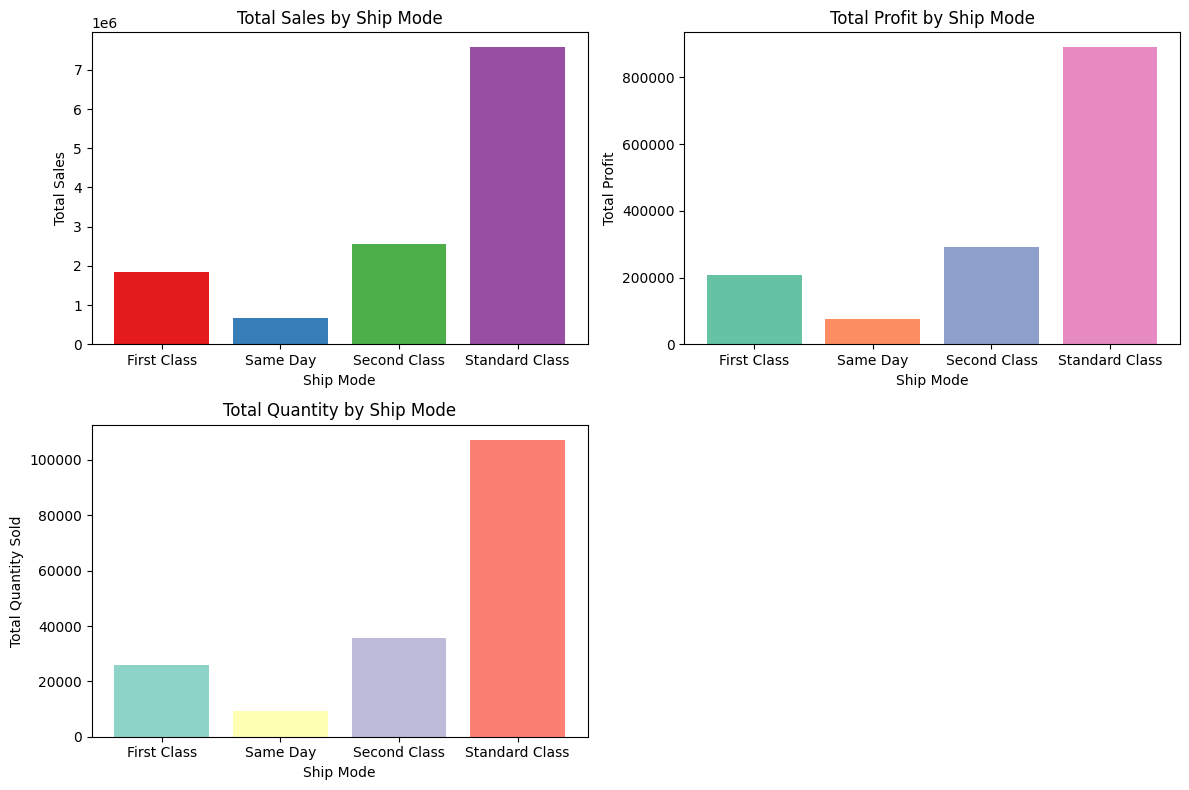

In [54]:
# Plotting
plt.figure(figsize=(12, 8))


# Sales plot
plt.subplot(2, 2, 1)
plt.bar(Ship_Mode_analysis['Ship Mode'], Ship_Mode_analysis['Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(Ship_Mode_analysis['Ship Mode'], Ship_Mode_analysis['Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(Ship_Mode_analysis['Ship Mode'], Ship_Mode_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

Standard Class seems to be the most preferred shipping option. This may likelybe due to its balance between cost and delivery speed.

Same Day shipping, while accounting for fewer orders, caters to customers with urgent delivery requirements and contributes to overall customer satisfaction.

In [55]:
 # Grouping the  data by segment and calculate sum of Sales, Profit and Quantity
Segment_analysis = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [56]:
Segment_analysis.sort_values(by='Sales',ascending=False).style.background_gradient(cmap='BrBG')


,Segment,Sales,Profit,Quantity
0,Consumer,6507949.417860,749239.782060,92157
1,Corporate,3824697.521460,441208.328660,53565
2,Home Office,2309854.970560,277009.180560,32590


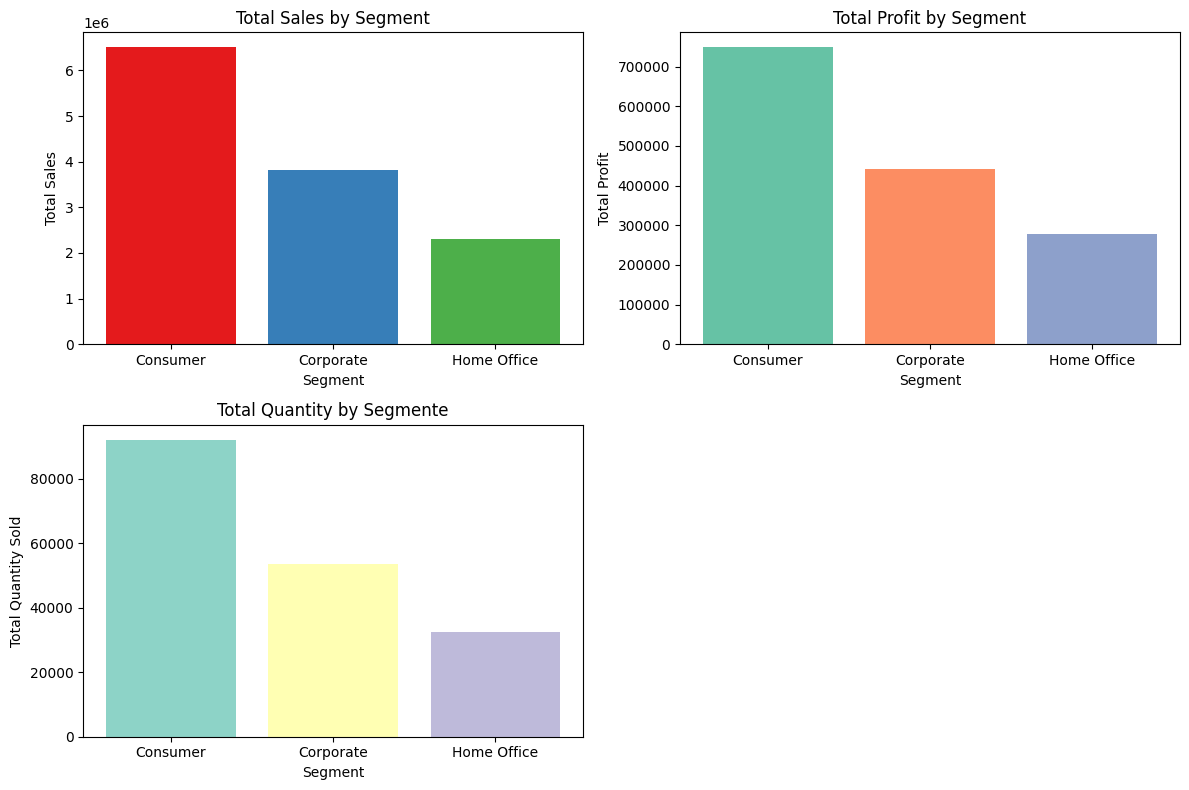

In [57]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(Segment_analysis['Segment'], Segment_analysis['Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(Segment_analysis['Segment'], Segment_analysis['Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(Segment_analysis['Segment'], Segment_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Segmente')
plt.xlabel('Segment')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

Consumer segment seems to be the primary revenue generator, indicating a large and loyal customer base.

Corporate segment contributes significantly to sales and profit, underscoring the importance of B2B relationships and bulk purchases.

Home Office segment represents a niche market with moderate sales but high-profit margins, suggesting opportunities for targeted marketing and product offerings tailored to this demographic.

In [58]:
# Group data by City nth and calculate sum of Sales, Profit and Quantity
City_analysis = df.groupby('City').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).head(10).reset_index()

In [59]:
City_analysis


,City,Sales,Profit,Quantity
0,New York City,"256,368.16","62,036.98",3417
1,Los Angeles,"175,851.34","30,440.76",2879
2,Manila,"120,886.95","-11,158.56",1661
3,Seattle,"119,540.74","29,156.10",1590
4,San Francisco,"112,669.09","17,507.39",1935
5,Philadelphia,"109,077.01","-13,837.77",1981
6,Sydney,"101,945.52","16,002.81",975
7,Jakarta,"94,321.32","3,826.98",1226
8,London,"86,945.80","17,378.72",1033
9,Mexico City,"85,700.25","13,335.59",1138


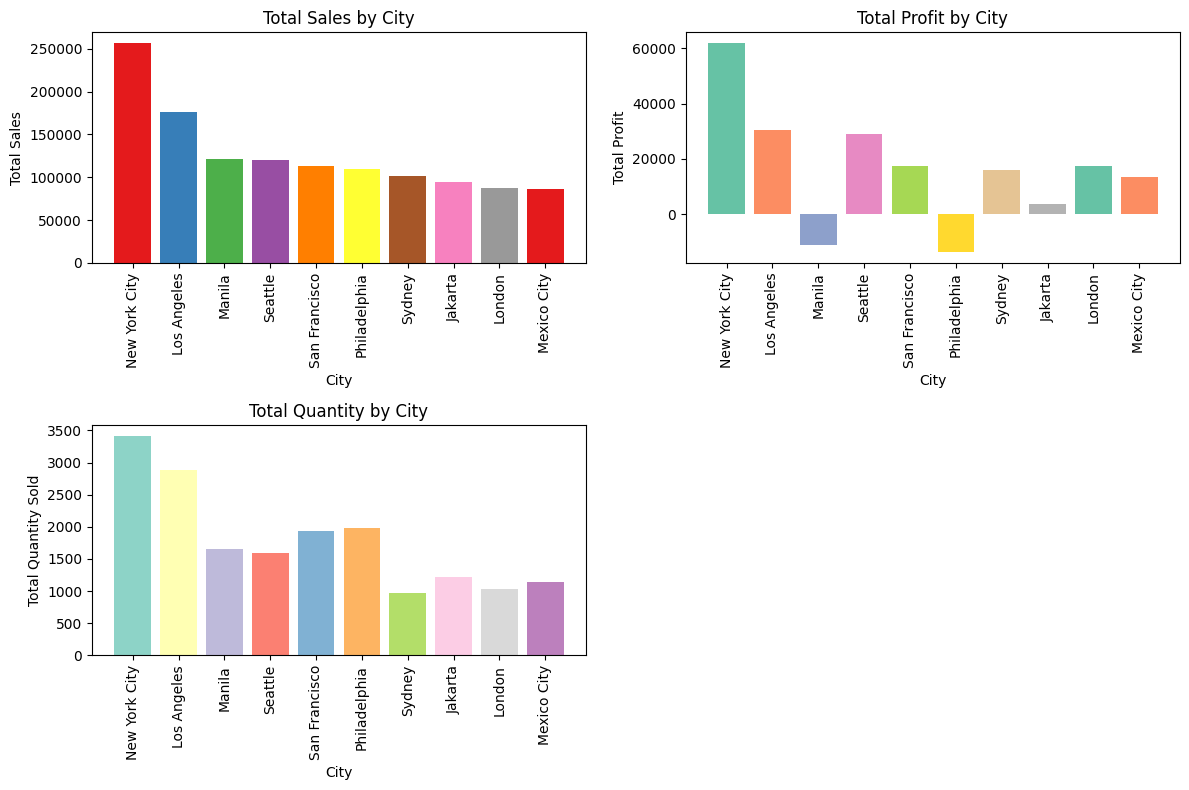

In [60]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(City_analysis['City'], City_analysis['Sales'], color=sns.color_palette('Set1'))
plt.xticks(rotation=90)
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(City_analysis['City'], City_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by City')
plt.xlabel('City')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(City_analysis['City'], City_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Total Quantity by City')
plt.xlabel('City')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

Certain cities like New York City, Los Angeles, and San Francisco emerge as key revenue generators, indicating their importance in the company's sales strategy.

Negative profit in cities like Manila and Philadelphia suggests the need for operational improvements or pricing adjustments to ensure profitability.

Understanding sales and profit by city can inform targeted marketing efforts, pricing strategies, and operational decisions to optimize performance in different markets.

In [61]:
# Group data by State and calculate sum of Sales, Profit and Quantity
State_analysis =df.groupby('State').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).head(10).reset_index()

In [62]:
State_analysis


,State,Sales,Profit,Quantity
0,England,"485,170.97","99,907.73",5656
1,California,"457,687.63","76,381.39",7667
2,Ile-de-France,"317,822.54","44,055.92",3839
3,New York,"310,876.27","74,038.55",4224
4,New South Wales,"270,487.10","43,695.98",2921
5,Queensland,"238,312.73","21,608.75",2665
6,North Rhine-Westphalia,"216,451.85","42,347.87",2660
7,Texas,"170,188.05","-25,729.36",3724
8,San Salvador,"153,639.40","35,883.38",2273
9,National Capital,"152,175.36","-13,066.08",2231


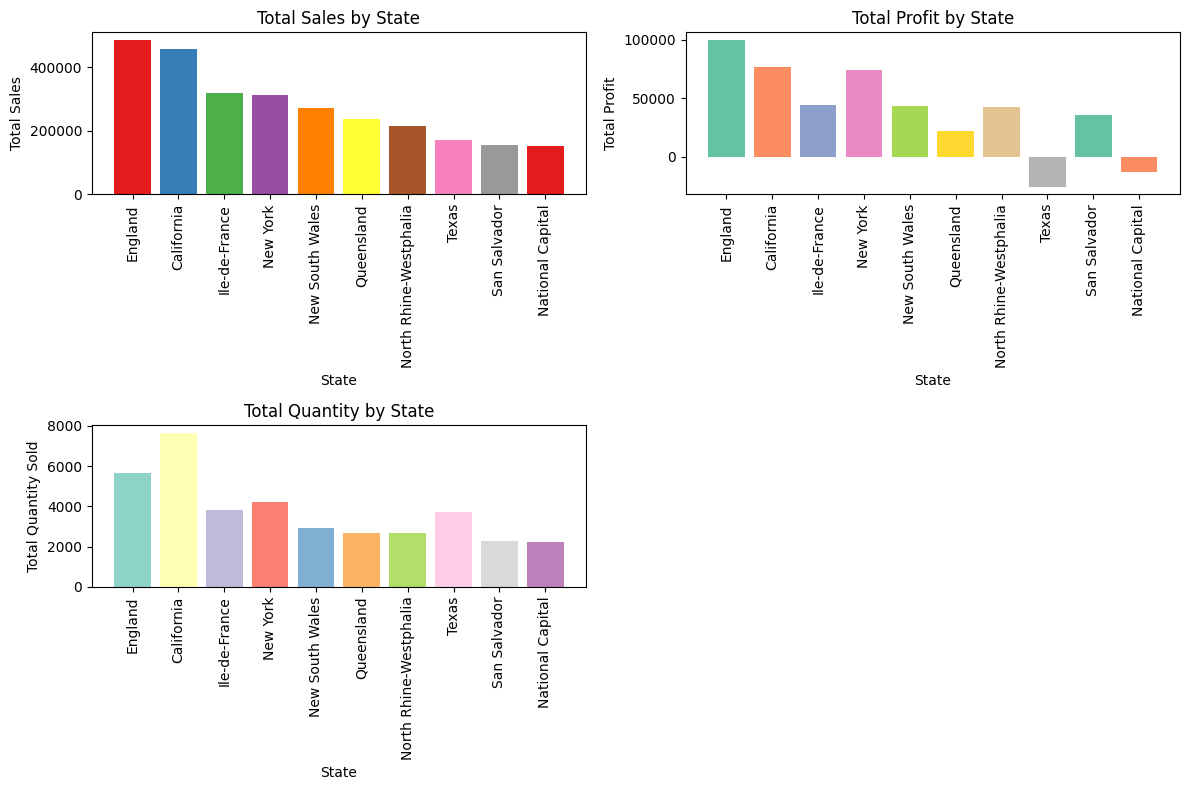

In [63]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(State_analysis['State'], State_analysis['Sales'], color=sns.color_palette('Set1'))
plt.xticks(rotation=90)
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(State_analysis['State'], State_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(State_analysis['State'], State_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Total Quantity by State')
plt.xlabel('State')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

Certain states like England, California, and New York emerge as key revenue drivers, indicating their importance in the company's sales strategy.

Negative profit margins in markets like Texas and National Capital underscore the need for operational improvements or pricing adjustments to ensure profitability.

In [65]:
##  Group data by Country and calculate sum of Sales, Profit and Quantity
Country_analysis = df.groupby('Country').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).head(10).reset_index()

In [66]:
Country_analysis

,Country,Sales,Profit,Quantity
0,United States,"2,297,200.86","286,397.02",37873
1,Australia,"925,235.85","103,907.43",10673
2,France,"858,931.08","109,029.00",10804
3,China,"700,562.03","150,683.08",7081
4,Germany,"628,136.19","107,190.33",7739
5,Mexico,"621,552.65","102,453.59",9972
6,India,"589,486.04","129,050.60",5755
7,United Kingdom,"528,576.30","111,900.15",6161
8,Indonesia,"404,887.50","15,608.68",5237
9,Brazil,"359,924.86","29,686.90",6123


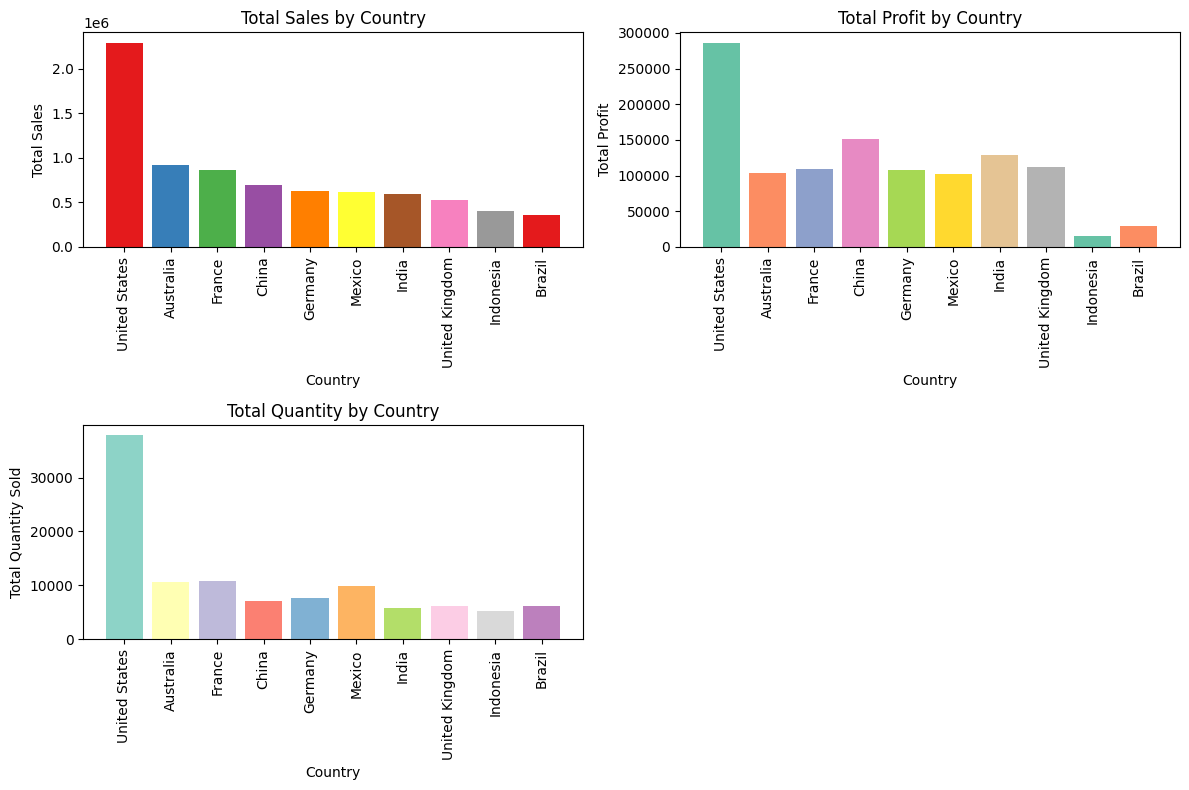

In [67]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(Country_analysis['Country'], Country_analysis['Sales'], color=sns.color_palette('Set1'))
plt.xticks(rotation=90)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(Country_analysis['Country'], Country_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by Country')
plt.xlabel('Country')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(Country_analysis['Country'], Country_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Total Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

The United States emerges as the primary revenue driver, indicating its critical importance in the company's sales strategy and market dominance.

High-profit margins in countries like Australia, China, and India suggest opportunities for growth and expansion in these markets.

Understanding sales and profit by country can inform international expansion strategies, resource allocation, and market-specific initiatives to optimize performance and maximize profitability.

In [68]:
##  Group data by Market and calculate sum of Sales, Profit and Quantity

Market_analysis = df.groupby('Market').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [69]:
Market_analysis.sort_values(by='Sales', ascending=False).style.background_gradient(cmap='BrBG')


,Market,Sales,Profit,Quantity
1,Asia Pacific,4042658.268000,403176.038000,48597
2,Europe,3287336.233500,449551.723500,41919
4,USCA,2364129.030300,304214.411700,38706
3,LATAM,2164605.167080,221643.487080,38526
0,Africa,783773.211000,88871.631000,10564


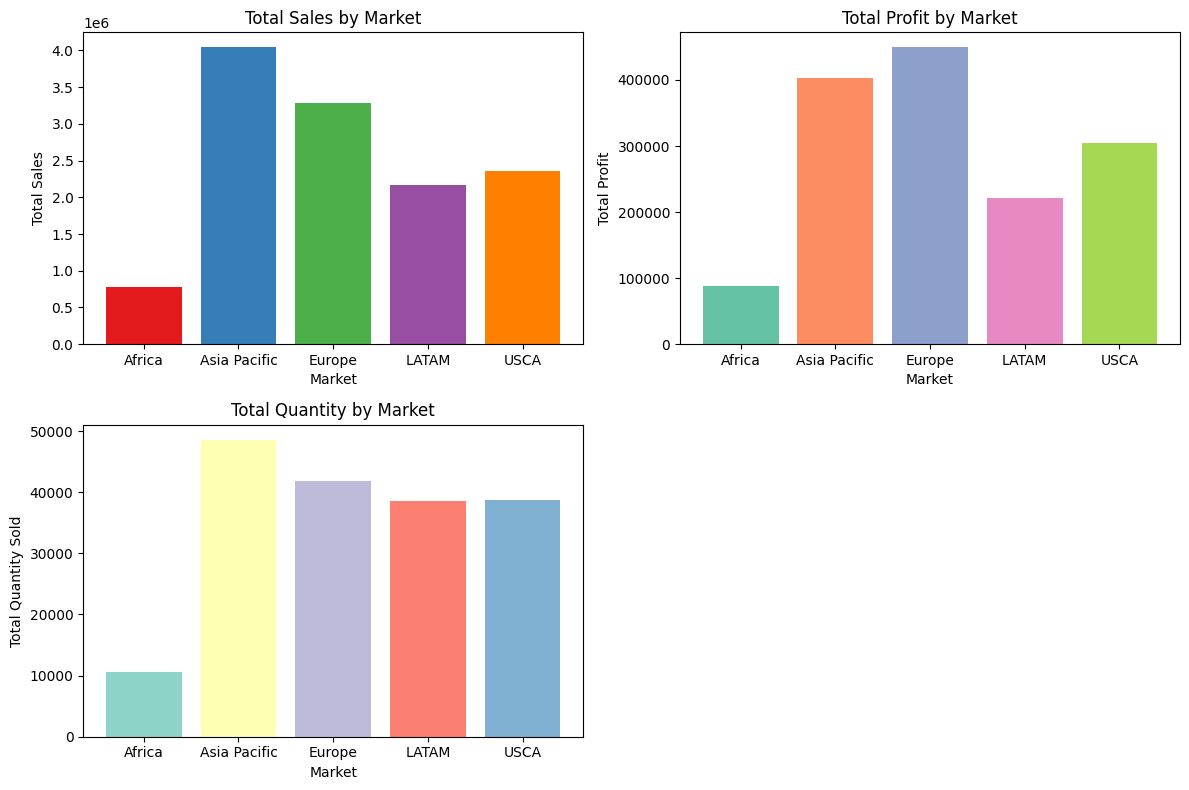

In [70]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(Market_analysis['Market'], Market_analysis['Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Market')
plt.xlabel('Market')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(Market_analysis['Market'], Market_analysis['Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Market')
plt.xlabel('Market')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(Market_analysis['Market'], Market_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Market')
plt.xlabel('Market')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

The Asia Pacific market emerges as the primary revenue driver, indicating its critical importance in the company's sales strategy and market dominance.

Europe and USCA markets also show significant sales and profit, suggesting opportunities for growth and expansion in these regions.

Understanding sales and profit by market can inform strategic decisions regarding resource allocation, market-specific initiatives, and expansion strategies to optimize performance and maximize profitability.

In [72]:
##  Group data by Category and calculate sum of Sales, Profit and Quantity
Category_analysis = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [73]:
Category_analysis.sort_values(by='Sales', ascending=False).style.background_gradient(cmap='BrBG')


,Category,Sales,Profit,Quantity
2,Technology,4744557.498080,663778.733180,35176
0,Furniture,4110451.898300,285082.730200,34892
1,Office Supplies,3787492.513500,518595.827900,108244


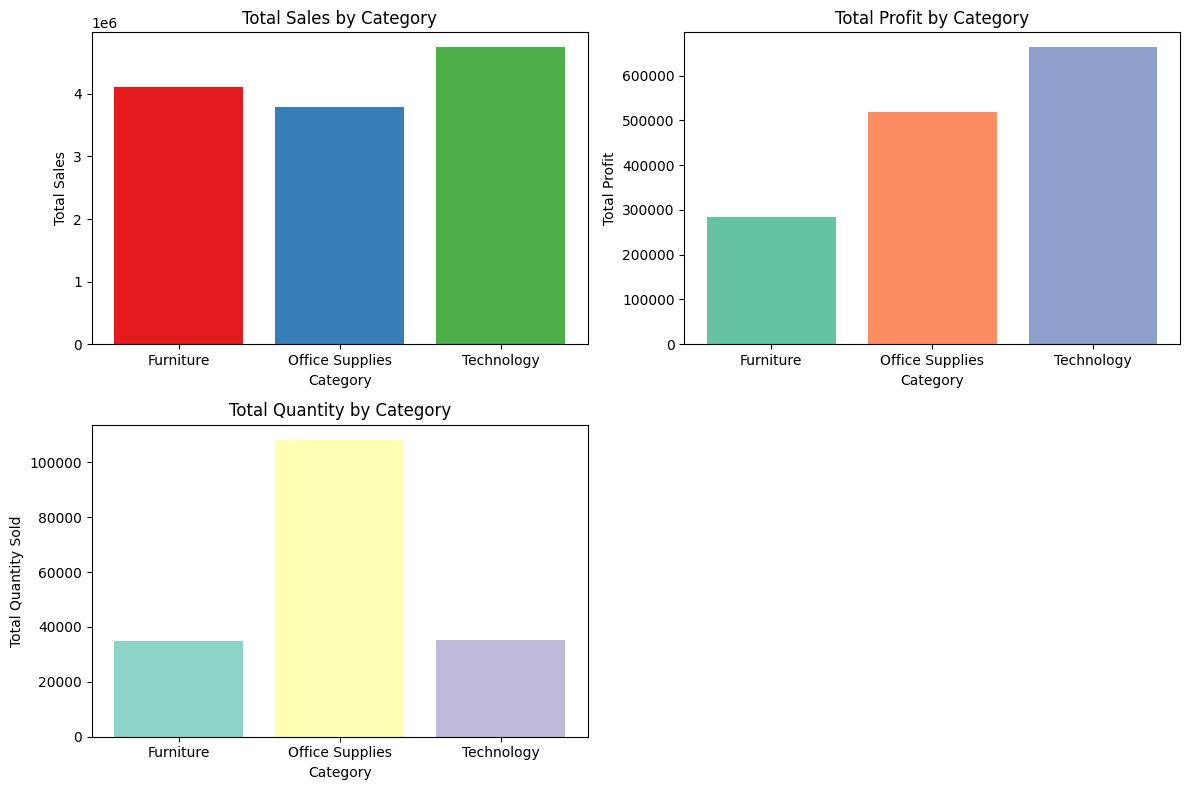

In [74]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(Category_analysis['Category'], Category_analysis['Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(Category_analysis['Category'], Category_analysis['Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(Category_analysis['Category'], Category_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

Technology products contribute significantly to total sales and profit, highlighting their importance in the company's product portfolio and revenue generation.

Office Supplies demonstrate high sales volume but comparatively lower profitability, suggesting potential opportunities for cost optimization or pricing strategies to enhance profitability in this category.

In [75]:
##  Group data by SUb-Category and calculate sum of Sales, Profit and Quantity
Sub_Category_analysis = df.groupby('Sub-Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).reset_index()

In [76]:
Sub_Category_analysis.style.background_gradient(cmap='BrBG')


,Sub-Category,Sales,Profit,Quantity
0,Phones,1706824.139200,216717.005800,11870
1,Copiers,1509436.273280,258567.548180,7454
2,Chairs,1501681.764200,140396.267500,12336
3,Bookcases,1466572.241800,161924.419500,8310
4,Storage,1126812.969400,108416.680600,16884
5,Appliances,1010535.525000,141562.587700,6026
6,Machines,779060.067100,58867.873000,4906
7,Tables,757041.924400,-64083.388700,3083
8,Accessories,749237.018500,129626.306200,10946
9,Binders,461869.393700,72433.151600,21403


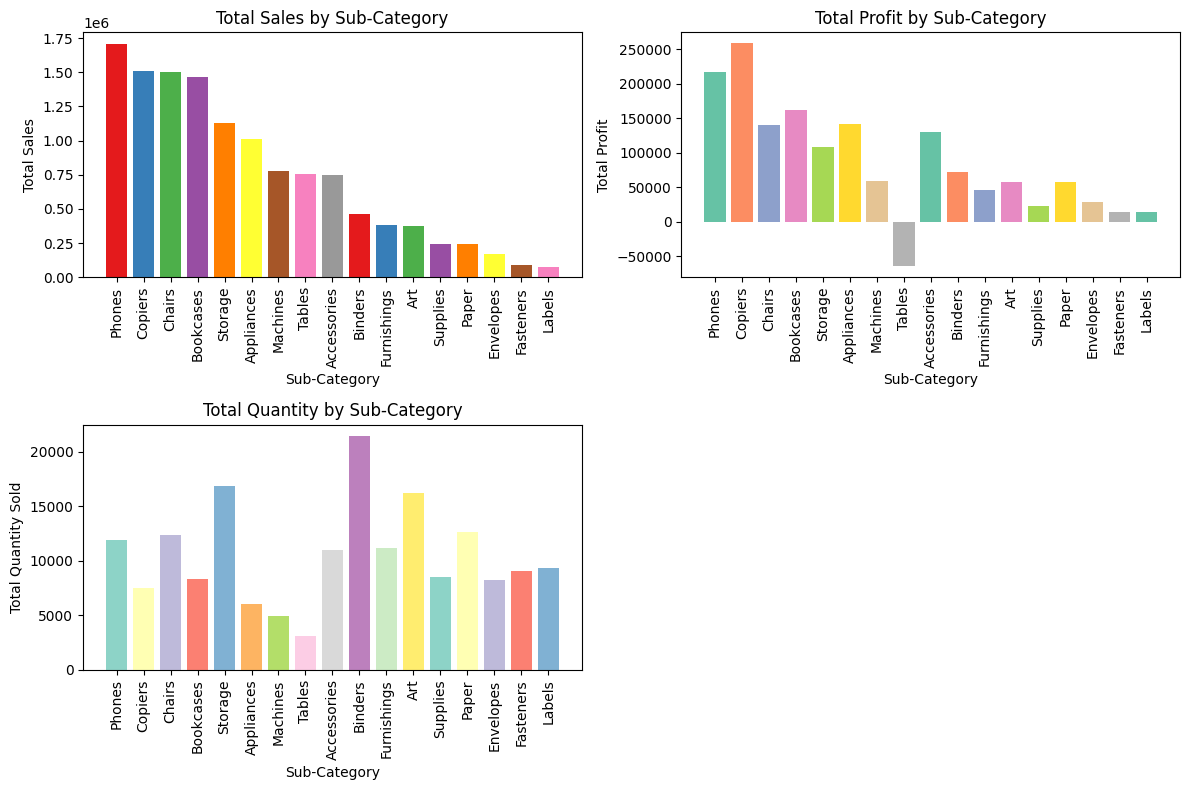

In [77]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(Sub_Category_analysis['Sub-Category'], Sub_Category_analysis['Sales'], color=sns.color_palette('Set1'))
plt.xticks(rotation=90)
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(Sub_Category_analysis['Sub-Category'], Sub_Category_analysis['Profit'], color=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(Sub_Category_analysis['Sub-Category'], Sub_Category_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.xticks(rotation=90)
plt.title('Total Quantity by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

Sub-categories like Phones, Copiers, and Chairs demonstrate strong sales performance and profitability, suggesting potential growth opportunities or competitive advantages in their respective markets.

Addressing challenges in sub-categories like Tables, where profitability is negative, may require review or adjustment of pricing strategies, cost structures, or product offerings to improve performance and sustainability.

In [78]:
Sub_Category_analysis.query('Quantity == Quantity.max()')


,Sub-Category,Sales,Profit,Quantity
9,Binders,"461,869.39","72,433.15",21403


Binders emerge as the most sold sub-category, indicating high demand or popularity among customers.

In [82]:
## Getting the number of returns by Product ID 
Return_analysis = df.groupby('Product ID').agg({
    'Returned': 'count',
}).sort_values(by='Returned', ascending=False)

In [83]:
Return_analysis.head(10).style.background_gradient(cmap='BrBG')

,Returned
Product ID,
OFF-FA-6129,227
OFF-BI-3737,92
OFF-ST-4057,90
OFF-ST-5693,84
OFF-BI-4828,83
OFF-AR-5923,80
OFF-ST-6033,77
OFF-BI-2917,75
OFF-AR-6120,75


Product ID: OFF-FA-6129:

Records the highest number of returns, totaling 227 units.

Understanding the products with the highest number of returns can provide valuable insights into potential quality issues, customer preferences, or market trends.

In [85]:
discount_analysis = df.groupby('Discount').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index().sort_values(by='Sales', ascending=False).style.background_gradient(cmap='Blues')
discount_analysis

,Discount,Sales,Profit
2,0.070000,810.779022,140.990022
12,0.350000,784.479406,-116.144693
20,0.570000,678.733500,-526.129000
19,0.550000,630.865800,-315.067200
1,0.002000,567.018701,125.762649
4,0.150000,565.674387,50.602409
10,0.300000,555.682421,-57.899557
11,0.320000,536.794770,-88.560656
8,0.250000,444.723977,4.043371
13,0.370000,427.270512,-78.462191


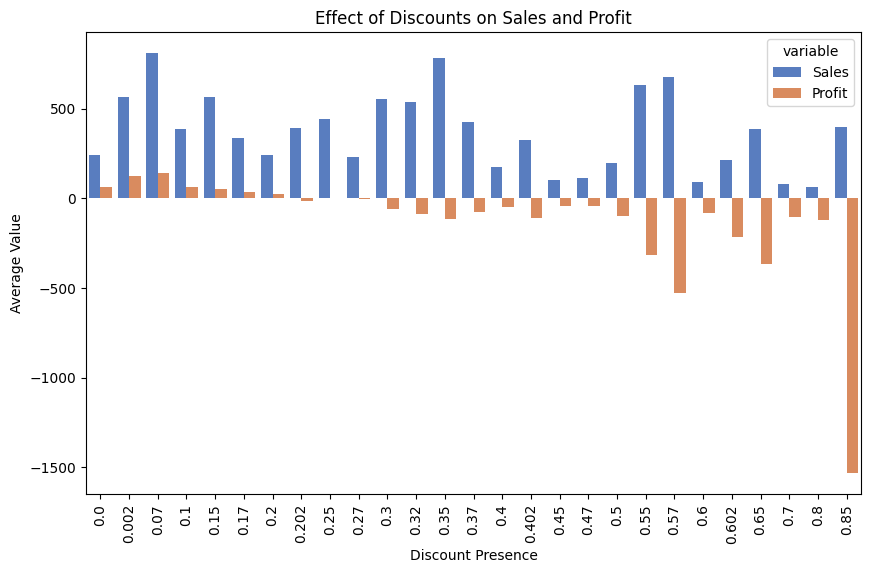

In [86]:
# Group data by 'Discount' and calculate average sales and profit for each group
discount_analysis = df.groupby('Discount').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()

# Melt and plot the DataFrame
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount', y='value', hue='variable', data=pd.melt(discount_analysis, id_vars='Discount'), palette='muted')

# Adding labels and title
plt.xticks(rotation=90)
plt.xlabel('Discount Presence')
plt.ylabel('Average Value')
plt.title('Effect of Discounts on Sales and Profit')

# Display the plot
plt.show()

Discounts can drive sales volume but may not always translate into increased profitability, as seen in cases of high discounts resulting in negative profits.

Analyzing the impact of discounts on sales and profit can help in optimizing pricing strategies to balance revenue generation and profit margins effectively.

Identifying the most effective discount levels that maximize sales while maintaining acceptable profit margins is crucial for sustainable business growth.

In [88]:
# Grouping the count of order priority by ship mode 
order_analysis = df.groupby('Ship Mode').agg({
    'Order Priority': 'count',
}).sort_values(by='Order Priority', ascending=False).reset_index()
order_analysis

,Ship Mode,Order Priority
0,Standard Class,30775
1,Second Class,10309
2,First Class,7505
3,Same Day,2701


Standard Class appears to be the most commonly chosen shipping option, suggesting it may be the most cost-effective or efficient for most orders.

### Summary and Conclusion:

**Sales and Profitability:**
Sales and profitability have consistently grown over the years, with notable increases seen in 2014 and 2015.

The technology category leads in sales, followed by furniture and office supplies.

Phones, copiers, and chairs are the top-selling sub-categories, making significant contributions to overall sales and profits.

Binders and office furniture (FUR-CH) are the highest-selling products, indicating strong demand in these areas.

**Customer Segments and Regions:**
The consumer segment generates the highest sales and profits, followed by the corporate and home office segments.

Western Europe, Central America, and Oceania are the top-performing regions in terms of sales and profits, highlighting potential opportunities for expansion or greater focus.

**Shipping Dynamics:**
Standard class shipping is the most popular choice, emphasizing the importance of cost-effective delivery options for customers.

The majority of orders are categorized as medium priority, balancing cost with delivery speed.

**Discount and Return Analysis:**
The majority of orders are made without discounts, suggesting competitive pricing strategies or limited promotional efforts.

The return rate is low, with most products not being returned, indicating high product quality or effective customer service.

**Future Protocol:**
Establish a protocol for ongoing analysis of sales and profitability, with a focus on segment and regional performance.

Optimize shipping expenses through strategic planning and the use of technology.

Improve customer experience with personalized communication and regular feedback collection.

Stay adaptable and responsive to shifting market trends and consumer preferences.

---

### Conclusion:
A thorough understanding of sales, profitability, and shipping trends is essential for making informed business decisions and improving operational efficiency. By leveraging these insights, businesses can enhance customer satisfaction, streamline logistics, and ultimately drive greater profitability.